<a href="https://colab.research.google.com/github/Liam-Nova/BIT_IA_Bootcamp/blob/main/S6_C4_PCA_Clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


# Análisis Exploratorio de datos

In [ ]:
iris = sns.load_dataset('iris')
df = pd.DataFrame(iris)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df['species'].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


:

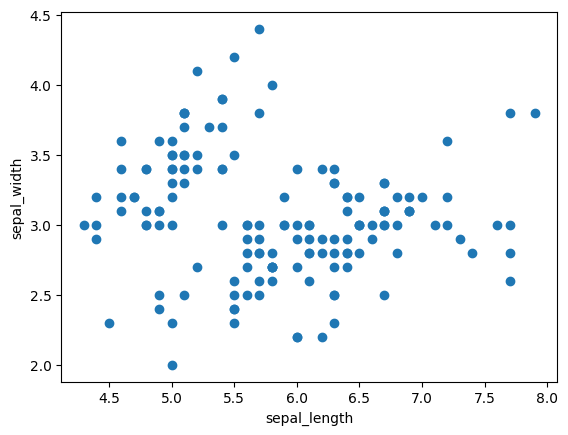

In [ ]:
# muestra como se relacionan dor parametros
plt.scatter(df['sepal_length'], df['sepal_width'])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

<Figure size 2000x2000 with 0 Axes>

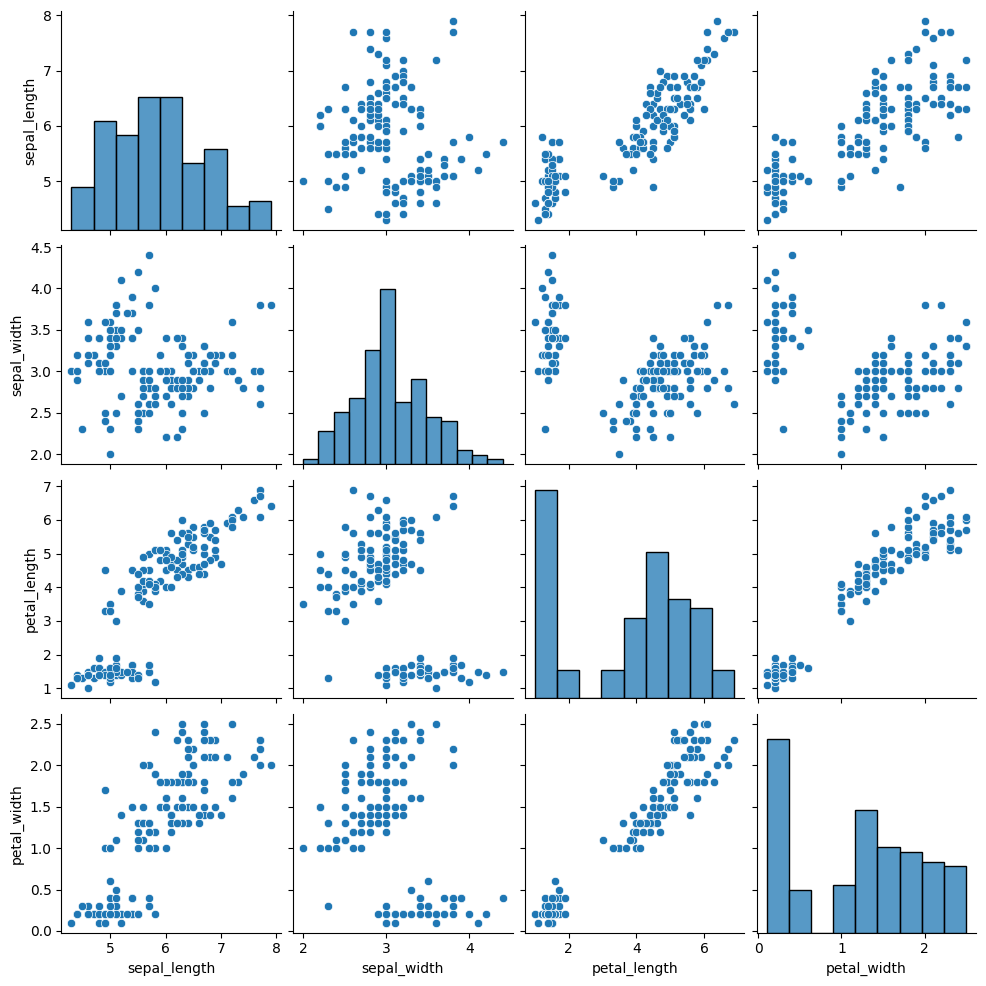

In [ ]:
# para entender la correlacion de los parametros mediante un conjunto de graficos
# mide la desviacion estandar de cada parametro
  # define los rangos(en el eje x,y) y mide cuantos datos caben en cada rango

sns.set_style('whitegrid')
sns.pairplot(df)

In [ ]:
X = df.drop('species', axis=1)
y = df['species']

#X = df['sepal_length',	'sepal_width',	'petal_length',	'petal_width']
#y = df['species']

In [ ]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
#mide  cuanta coeficiente de correlacion tienen las variables(parametros/columnas)
matrixCorr = X.corr()
matrixCorr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<Axes: >

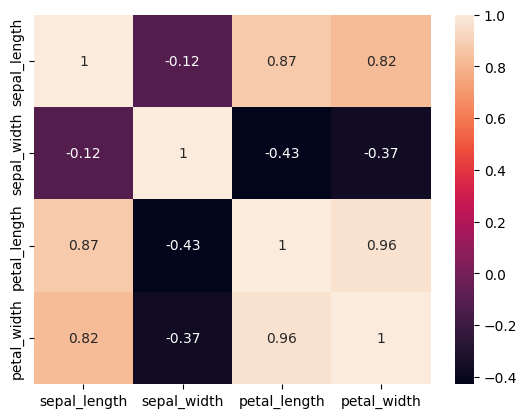

In [ ]:
sns.heatmap(matrixCorr, annot=True)

# PCA: Análisis de componentes principales

Normalizar es llavar los datos a unos rangos mas pequeños

* Costos: en miles, o en millones
* Sectores Categorías -> vector numérico (0 a 19)

convertir todos los datos a una escala de (0 a 5)

StandardScaler

* Calcula la media y la desviación de cada característica  (columna)
* Organiza los datos para que la media de los datos sea 0, y una desviación estandar



In [ ]:
scaler = StandardScaler()
scaled = scaler.fit_transform(
    iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
    )
# datos escalados

In [ ]:
# covariancia entre los datos escalados
cov_matrix = np.cov(scaled.T)
cov_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [ ]:
matrixCorr = X.corr()
matrixCorr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


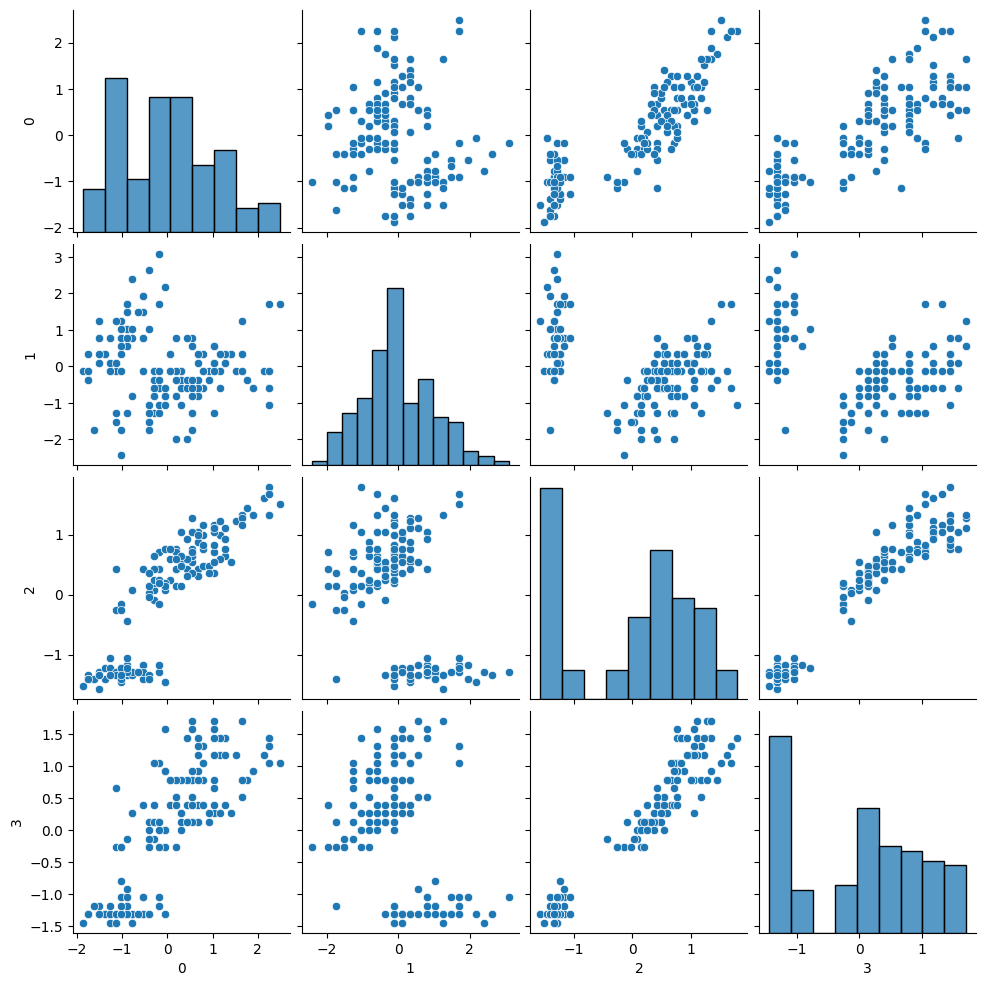

In [ ]:
# reubica los datos en un plano con contro de x, y en torno a cero
# para poder hacer la proyeccion de las direcciones de los datos en torno a 0
sns.pairplot(pd.DataFrame(scaled))

Libreria numpy para valores y vectores propios https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html

In [ ]:
import numpy as np
from numpy import linalg as LA

In [ ]:
eigenvalues, eigenvectors = LA.eig(cov_matrix) # asignación de valores y vectores propios

In [ ]:
eigenvalues # valores

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [ ]:
eigenvectors # vectores propios

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [ ]:
suma = eigenvalues.sum() # suma de los valores propios
suma

4.026845637583891

In [ ]:
eigenvalios_porcentaje = eigenvalues/suma*100
eigenvalios_porcentaje

array([72.96244541, 22.85076179,  3.66892189,  0.51787091])

In [ ]:
var_explaind = np.round([(i/suma)*100 for i in eigenvalues],2)
var_explaind

array([72.96, 22.85,  3.67,  0.52])

porcentaje : array(**[72.96, 22.85**,  3.67,  0.52])

es para saber con que caracteristicas se pueden hacer mejores predicciones en machine learning

**sklearn PCA**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
data_PCA = PCA(n_components=2) # asigno la cantidad de los componentes principales que quiero tener"
data_PCA.fit(scaled) # entrenamiento de los componentes pero con los datos escalados

PCA(n_components=2)

In [ ]:
data_PCA.explained_variance_ratio_ #?

array([0.72962445, 0.22850762])

con el fin de mejorar el rendimiento y que sea mas eficiente el calculo se realiza este proceso

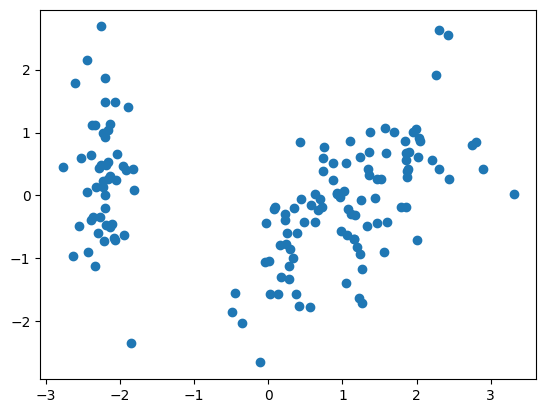

In [ ]:
reduced_scaled = data_PCA.transform(scaled) # actualiza los datos originales a los nuevos rangos de scaled
reduced_scaled
plt.scatter(reduced_scaled[:,0], reduced_scaled[:,1])

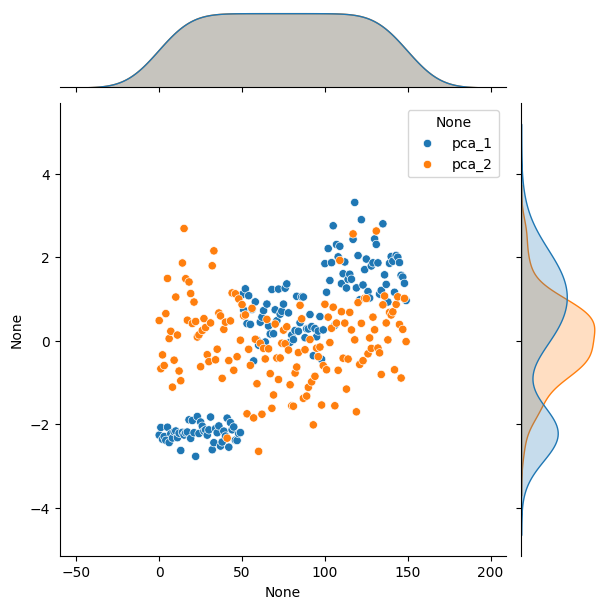

In [ ]:
df['pca_1'] = reduced_scaled[:,0]
df['pca_2'] = reduced_scaled[:,1]

sns.jointplot(df[['pca_1', 'pca_2']])#, hue= df['species'])